In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from markovchain import MarkovChain

# Procesos de Markov

Los procesos de Markov estan regidos por la condicion de que el estado actual solo depende del estado anterior.

$$
P(X_{n + 1} = x | X_n = x_n)
$$

Supongamos que tenemos los estados $A$ y $B$

<b>Ejemplo</b>: supongamos que tenemos una maquina que el estado A es funcionando y el estado B es rota.

P(A/B) es la probabilidad de que dado que estamos en el estado B pasemos al estado A.

#### Matriz de Markov

$$
P =
\begin{bmatrix}
P(A / A) & P(B / A) \\
P(A / B) & P(B / B) \\
\end{bmatrix}
$$

<b>Nota</b>: las filas suman 1.

$$
P(A/A) + P(B/A) = 1
$$

$$
P(A/B) + P(B/B) = 1
$$

In [26]:
P_A_A = 0.2
P_B_A = 0.8
P_A_B = 0.1
P_B_B = 0.9

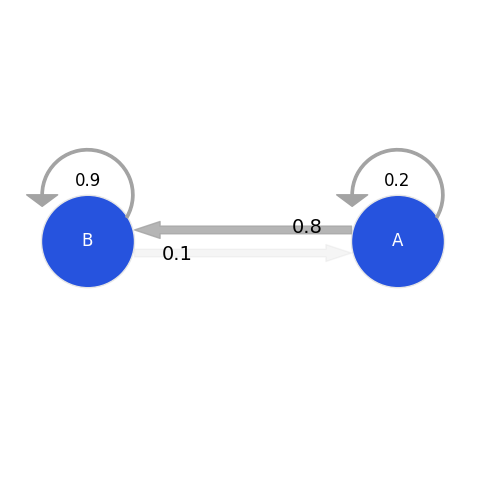

In [27]:
P = np.array([[P_A_A, P_B_A], [P_A_B, P_B_B]])
mc = MarkovChain(P, ['A', 'B'])
mc.draw()